### 📊 Use Cases

This notebook presents a few use cases of descriptive analytics of the **Power System Faults Dataset**, available on [Kaggle](https://www.kaggle.com/datasets/ziya07/power-system-faults-dataset). The dataset contains synthetic records of electrical power system faults across various geographic locations and weather conditions, designed for analysis, pattern recognition, and reliability prediction.

#### 📄 Dataset Description

Each row in the dataset represents a unique power system fault incident and includes information such as:

- **Fault Type** (e.g., Line Breakage, Transformer Failure)
- **Geographic Location** (Latitude & Longitude)
- **Environmental Conditions** (Temperature, Wind Speed, Weather)
- **Electrical Measurements** (Voltage, Current, Power Load)
- **Fault Duration and Downtime**
- **Maintenance and Component Health Status**

This EDA lays the groundwork for further reliability modeling, fault classification, or predictive maintenance applications.

In [1]:
# 📥 Import Required Libraries
import pandas as pd
import folium
import warnings
warnings.filterwarnings('ignore')

***
### 📥 Load the dataset from URL

In [2]:
url = 'https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/refs/heads/main/datasets/fault_data.csv'
df = pd.read_csv(url)

df.head()

,Fault ID,Fault Type,"Fault Location (Latitude, Longitude)",Voltage (V),Current (A),Power Load (MW),Temperature (C),Wind Speed (km/h),Weather Condition,Maintenance Status,Component Health,Duration of Fault (hrs),Down time (hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0


#### 📂 Load dataset from local folder

In [3]:
# df = pd.read_csv("data/fault_data.csv")

# df.head()

### ❓ What Happened?

We begin by exploring **what types of power system faults** occurred in the dataset.  
This helps us understand the kinds of incidents captured and their relative frequency.

🔎 We'll look at:
- The unique types of faults
- A count plot to visualize their distribution


🔧 Fault Types in the Dataset:
Fault Type
Transformer Failure    171
Overheating            171
Line Breakage          164
Name: count, dtype: int64


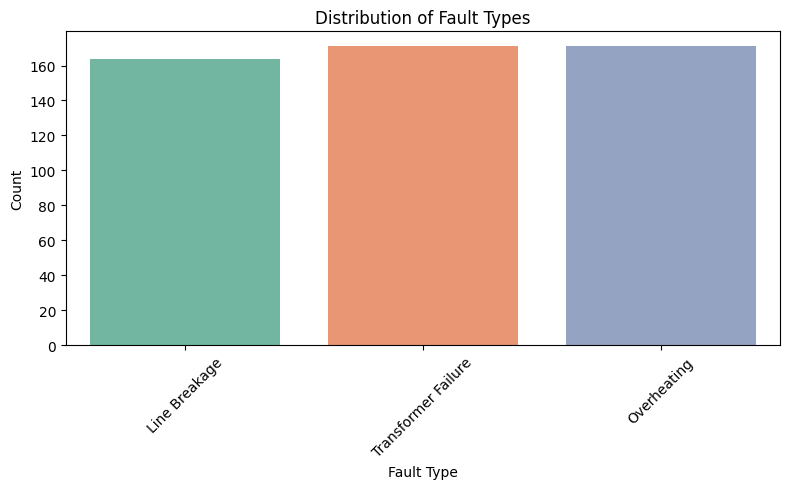

In [4]:
# Show unique fault types
print("🔧 Fault Types in the Dataset:")
print(df['Fault Type'].value_counts())

# Visualize fault type distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Fault Type', palette='Set2')
plt.title("Distribution of Fault Types")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***
### 📍 Where Did It Happen?

We explore the **geographic distribution** of power system faults using latitude and longitude data.

🗺️ This gives insights into:
- Fault concentration across regions
- Potential location-specific environmental impacts

In [5]:
# Parse lat/lon from the string column
df[['Latitude', 'Longitude']] = df['Fault Location (Latitude, Longitude)']\
    .str.replace('[()]', '', regex=True).str.split(', ', expand=True).astype(float)

# Center the map
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=8)

# Add markers for each fault
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Fault ID']} | {row['Fault Type']}",
        icon=folium.Icon(color="blue", icon="bolt", prefix="fa")
    ).add_to(m)

# Save and display map
# m.save("fault_location_map.html")
m

***
### 🔁 How Often Did It Happen?

We analyze **how frequently different fault types occurred**.  
This helps identify which issues are most common and may require priority in maintenance planning.

📊 We'll count:
- Frequency of each fault type 🔁 
- Frequency of weather conditions associated with faults 🌦️

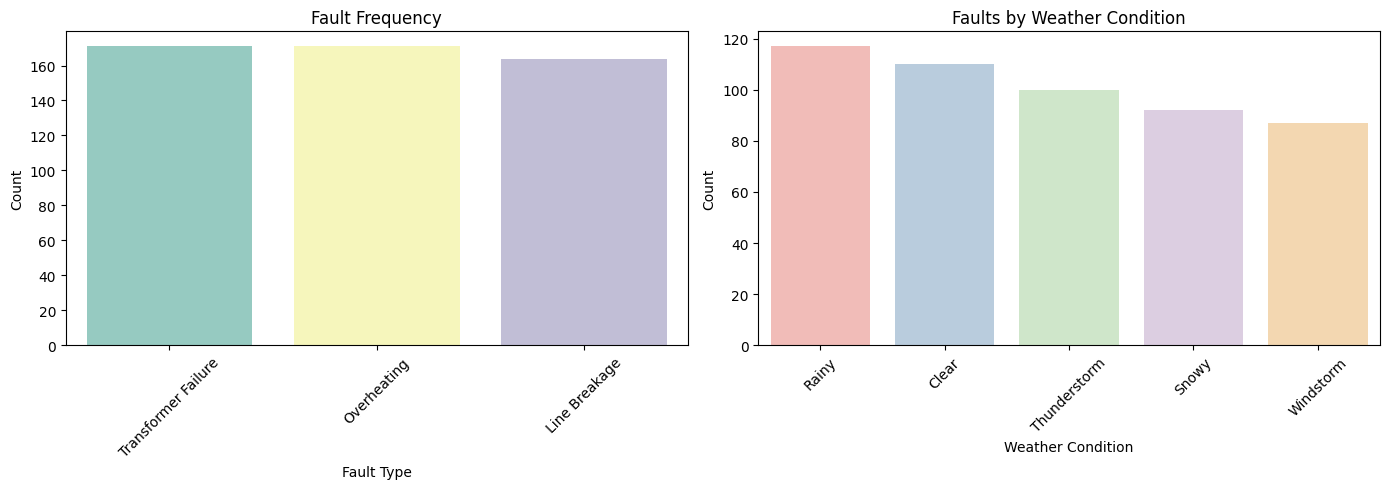

In [6]:
# Fault type frequency
fault_counts = df['Fault Type'].value_counts()

# Weather condition frequency
weather_counts = df['Weather Condition'].value_counts()

# Plot both side-by-side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=fault_counts.index, y=fault_counts.values, ax=axes[0], palette="Set3")
axes[0].set_title("Fault Frequency")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=weather_counts.index, y=weather_counts.values, ax=axes[1], palette="Pastel1")
axes[1].set_title("Faults by Weather Condition")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

***
### 🧬 What Were the Main Characteristics?

We now explore the **key electrical and environmental features** of the fault events.

📈 This includes:
- Voltage, current, power load
- Temperature, wind speed
- Fault duration and down time

We'll use **summary statistics** and **distributions** to describe their central tendency and spread.

📊 Summary Statistics of Numerical Features:


,Voltage (V),Current (A),Power Load (MW),Temperature (C),Wind Speed (km/h),Duration of Fault (hrs),Down time (hrs)
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2049.636364,216.458498,50.011858,30.166008,19.739130,4.008103,3.999802
std,142.054146,21.499787,3.102834,6.118315,5.863052,1.147271,1.842367
min,1800.000000,180.000000,45.000000,20.000000,10.000000,2.000000,1.000000
25%,1923.000000,197.250000,47.000000,25.000000,15.000000,3.000000,2.300000
50%,2058.000000,218.000000,50.000000,30.000000,19.500000,4.000000,4.000000
75%,2165.750000,235.000000,53.000000,36.000000,25.000000,5.000000,5.700000
max,2300.000000,250.000000,55.000000,40.000000,30.000000,6.000000,7.000000


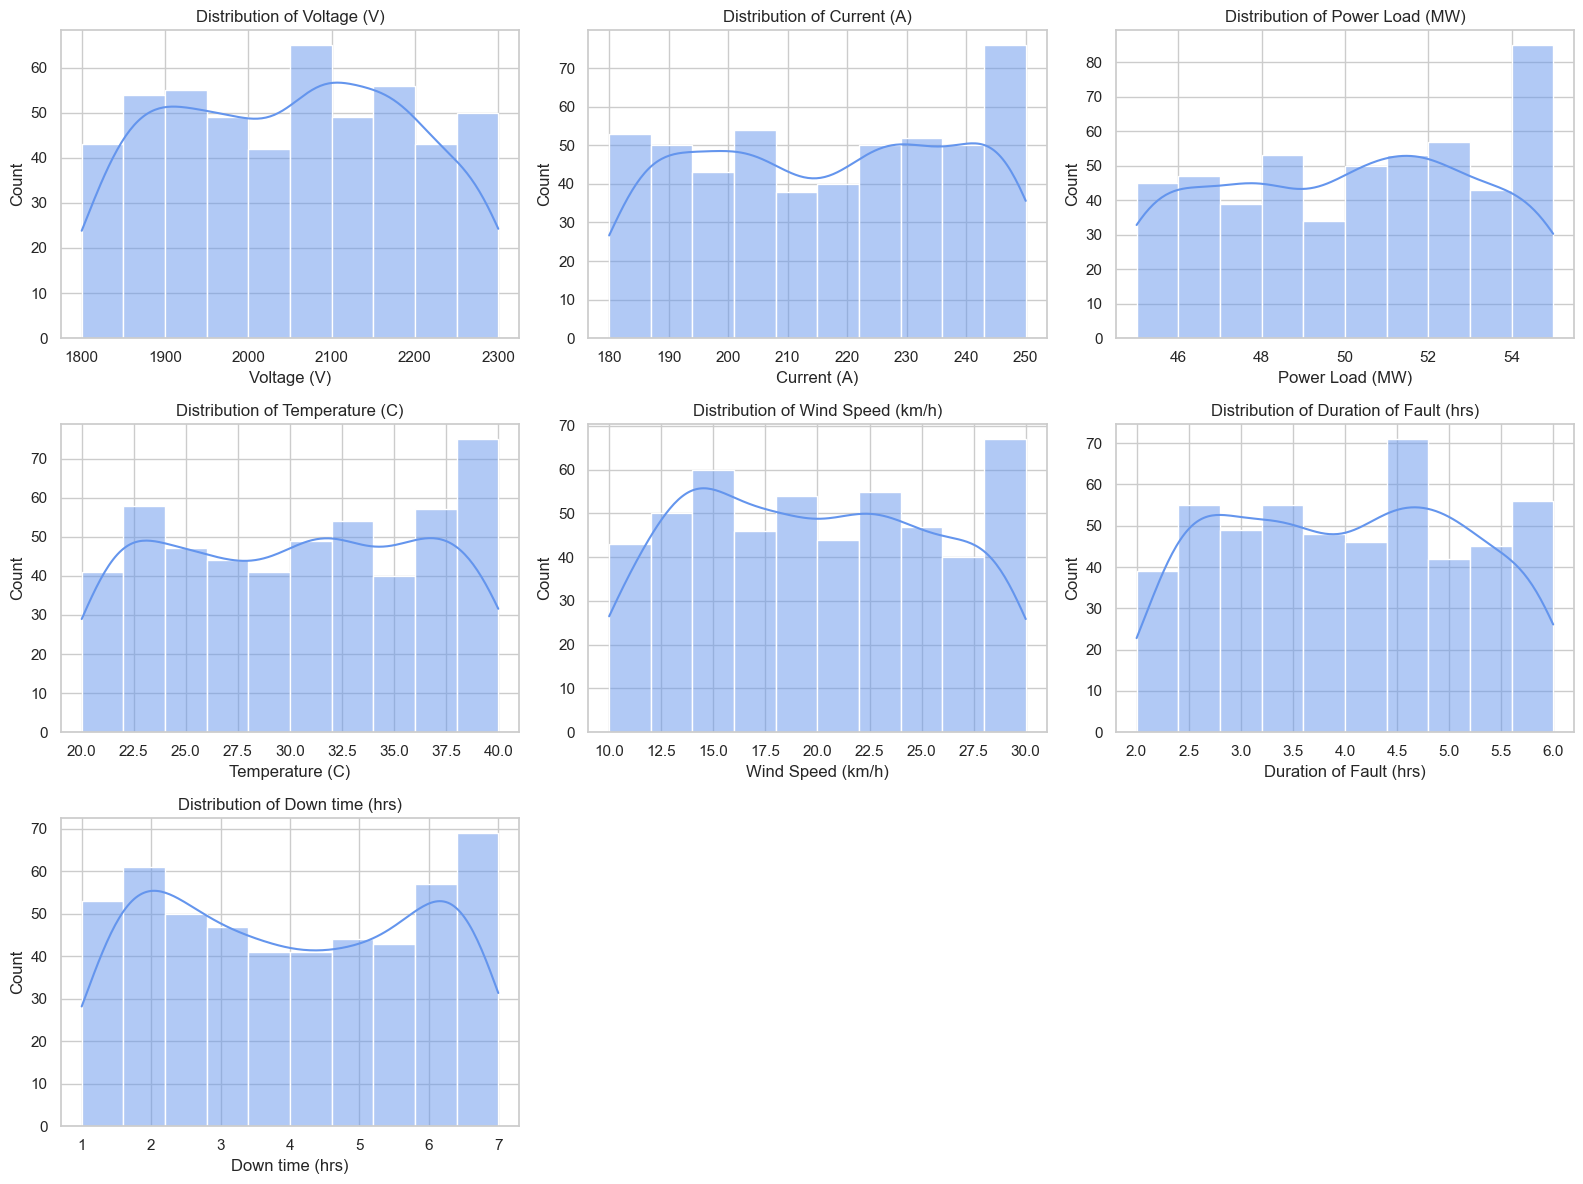

In [7]:
# Show summary statistics for numerical features
numerical_cols = [
    'Voltage (V)', 'Current (A)', 'Power Load (MW)', 
    'Temperature (C)', 'Wind Speed (km/h)', 
    'Duration of Fault (hrs)', 'Down time (hrs)'
]

print("📊 Summary Statistics of Numerical Features:")
display(df[numerical_cols].describe())

# Plot distributions
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='cornflowerblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()